<span style="font-family:Helvetica; color:gray">These exercise materials provided to you as a student of Aalto University are protected by copyright. You are authorized to use these materials for your personal educational purposes, including completing the exercises and submitting them for grading. You are prohibited from reproducing, distributing, displaying, or sharing any portion of these materials in any form, including, but not limited to, posting on the internet or other forms of electronic communication. Aalto University reserves all rights in the exercise materials.</span>

Exercise 5: Social networks structure
------------------------------------------------------------

The purpose of this exercise is to build a network based on the artificial social media data you have analysed previously, and to analyse the structure of that network.  

In [1]:
import networkx as nx
from matplotlib import pyplot as plt
import numpy as np
import json

We start by constructing the network of reposts, and doing some basic analysis on it: we compute some network statistics and plot the network. Your first task is to write the parser function 'construct_network'. **The A+ grader will grade your solution of the `construct_network` method automatically when you return this notebook to A+**. After completing the `construct_network` function and running this cell, you can test it out in the next cell. You can then return your solution to A+ for grading. 

**Please remember to remove the NotImplementedError exceptions once you've completed your implementation.**

In [2]:
def get_userposts(postsfilename):
    """
    This function reads a file containing posts in JSON format and returns a dictionary with keys 
    representing user IDs and values representing lists of posts made by that user.

    Args:
    postsfilename (str) : a string representing the name of the file containing the posts in JSON format.

    Returns: 
    userposts (dict): A dictionary with user IDs as keys and lists of posts as values. The lists of posts contain 
    dictionaries of the data for each post made by the corresponding user.
    """
    userposts = {}
    with open(postsfilename,'r') as postfile:
        for line in postfile:
            data = json.loads(line)
            if data["repost"]:
                userid = data["user_id"]
                if userid not in userposts:
                    userposts[userid] = []
                userposts[userid].append(data)
    return userposts

def construct_network(postfilename):
    """
    This function constructs a social network from a file of post data.

    Args:
    postfilename (str): The filename of the post data file.

    Returns:
    net (nx.Graph): A networkx graph object representing the social network.
    """

    userposts = {}
    with open(postfilename,'r') as postfile:
        for line in postfile:
            data = json.loads(line)
            if data["repost"]:
                orig_id = data["id_orig"]
                user_id = data["user_id"]
                if orig_id not in userposts:
                    userposts[orig_id] = []
                userposts[orig_id].append(user_id)
                if user_id not in userposts:
                    userposts[user_id] = []
                userposts[user_id].append(orig_id)
    
    net = nx.Graph()
    for user, posts in userposts.items():
        for post in posts:
            net.add_edge(user, post)

    return net
    # raise NotImplementedError
    # Fill in your code here!
    # Hints:
    # - You can look at the get_userposts method for hints how to parse the file
    # - Only choose the posts that are reposts
    # - Connect the users from fields "id_orig" (the original poster) and "user_id" (the reposter)
    # - The direction of the connection doesn't matter here because nx.Graph() is undirected network
    # - You can use the net.add_edge method to add links


The next cell uses the 'construct_network' method to create a network object, and runs some basic network analysis on it. It also visualizes the network. After successfully running this cell and inspecting the results, **answer questions 5.3.1, 5.3.2 and 5.3.3 on A+.**

The network has:
1998 nodes
7963 edges
7.970970970970971 average degree
0.009862796319078965 average clustering coefficient
4.3038757335202 average shortest path lenght


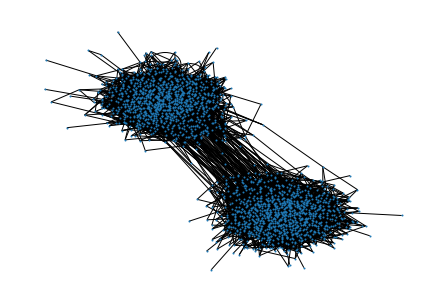

In [3]:
# Construct the network out of the post file
postsfilename = "dataset.jsonl"
net=construct_network(postsfilename)

# Print out some basic statistics of the network
print("The network has:")
print(len(net), "nodes")
print(net.number_of_edges(), "edges")
print(2*net.number_of_edges()/len(net), "average degree")
print(nx.average_clustering(net), "average clustering coefficient")
print(nx.average_shortest_path_length(net.subgraph(max(nx.connected_components(net), key=len))), "average shortest path lenght")

# Plot the network
plt.figure()
positions = nx.spring_layout(net)
nx.draw(net, positions, node_size=1)

Now that we are done with the basic statistics let's turn into clustering the network, i.e., finding communities in it. Here we use two built-in functions in NetworkX library and ask them to find exactly 2 communities. One of the methods is currently commented out, but you can try it by uncommenting it. The code below then draws the network again but now coloring the two communities, one in blue and the other in red. After playing around with this function, **answer question 5.3.4 in A+.**


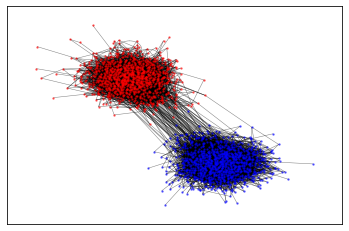

In [8]:

# Find the two clusters in the network
partition = nx.algorithms.community.kernighan_lin_bisection(net)
#partition=nx.algorithms.community.greedy_modularity_communities(net,cutoff=2,best_n=2)

# Draw the network with partitions
plt.figure()
nx.draw_networkx_nodes(net, positions,nodelist=partition[0], node_color='red', node_size=2, alpha=0.5)
nx.draw_networkx_nodes(net, positions,nodelist=partition[1], node_color='blue', node_size=2, alpha=0.5)
nx.draw_networkx_edges(net, positions, width=0.5, alpha=0.5)


Next you will inspect the content of the two communities you find. Use the 'get_hashtag' function to find what are the most common hashtags in the two groups you found in the network. What are the two groups of users you found? After inspecting the results, **answer question 5.3.5 on A+.**

In [15]:
def get_hashtags(group, postsfilename):
    """
    The function reads the posts data from the given file, extracts the posts belonging to the given group, 
    and counts the number of occurrences of each hashtag used in those posts. The function returns a list of 
    tuples containing the hashtags and their counts, sorted in descending order of their counts.

    Args:
    group (Set): A set of user IDs belonging to the group.
    postsfilename (str): The filename of the posts data file.

    Returns:
    List[Tuple[str, int]]: A list of tuples containing the hashtags and their counts, sorted in descending order of their counts.
    """
    hashtagcount = {}
    group = set(group)
    with open(postsfilename, 'r') as postfile:
        for line in postfile:
            data = json.loads(line)
            if data["user_id"] in group:
                for word in data["text"].split():
                    if word.startswith("#"):
                        hashtagcount[word] = hashtagcount.get(word, 0) + 1
    hashtaglist=sorted(list(hashtagcount.items()), key=lambda x:-x[1])
    return hashtaglist

# Find the 10 most used hashtags in each group
# Fill in your code here!
# Hints:
# - Read through the docstring of get_hashtags function
# - The "partition" produced by the community detection method is a list of 2 sets
hashtag1 = get_hashtags(partition[0], postsfilename)
hashtag2 = get_hashtags(partition[1], postsfilename)
print(hashtag1)
print("\n")
print(hashtag2)

[('#climatechange', 8146), ('#srccl2024', 7713), ('#srccl', 7708), ('#ipcc', 7696), ('#ipcc2024', 7671), ('#climatereport', 7655), ('#schoolstrike4climate', 4053), ('#noemptypromises', 4047), ('#fridays4future', 4043), ('#fridaysforfuture', 4000), ('#cliamtestrikeonline', 3995), ('#chooseforward', 3980), ('#climaterisk', 3944), ('#climate', 3898), ('#climatefriday', 3847), ('#climatemergency', 3159), ('#climatejustice', 3142), ('#climateaction', 3122), ('#climatestrike', 3111), ('#climatecatastrophy', 3110), ('#climatescience', 3095), ('#climatechangeisreal', 3074), ('#gretathunberg', 3067), ('#climatecrisis', 2990), ('#climatecult', 6), ('#globalwarminghoax', 5), ('#climatechangehoax', 5), ('#climatechangeisnotreal', 5), ('#climatefiction', 5), ('#climateclowns', 4), ('#globalwarming', 4), ('#climatehoax', 3), ('#climatehysteria', 3), ('#climatescam', 2), ('#climatefraud', 2)]


[('#climatechange', 12676), ('#globalwarming', 8575), ('#climatechangehoax', 8542), ('#climatechangeisnotre

Next we turn into investigating the degree distribution of the network. In the cell below you will plot the degree distribution of the network in a double-logarithmic scale. Think about implications of this kind of distribution in a social network, reflecting from what you learned in the lectures. After this, **answer the question 5.3.6 on A+.**

7.970970970970971


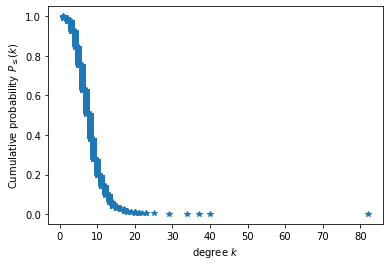

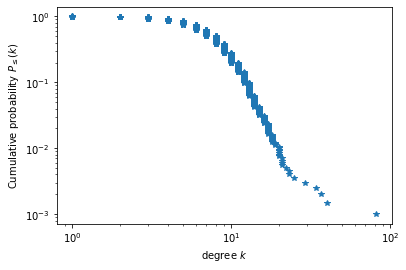

In [29]:
# Compute and plot the degree distribution

degrees = sorted([degree for node, degree in net.degree()], reverse=True)

# Plotting the cumulative degree distribution in linear scale.
# In the resulting figure, the degree will be on x-axis and the
# y-axis gives the probability of a node having degree equal or smaller
plt.figure()
plt.plot(degrees, np.arange(0, 1, 1/(len(net) + 1))[2:], '*')
plt.xlabel(r"degree $k$")
plt.ylabel(r"Cumulative probability $P_\leq (k)$")

# Plotting the same cumulative degree distribution but in log-log scale.
# Here a power-law degree distribution would show up as a straight line.
plt.figure()
plt.loglog(degrees, np.arange(0, 1, 1/(len(net) + 1))[2:], '*')
plt.xlabel(r"degree $k$")
plt.ylabel(r"Cumulative probability $P_\leq (k)$")
print(np.mean(degrees))

Are the features you have observed of this online social network, i.e., the communities and degree distribution, reflecting how this social system is organised in the offline world? Could there be an alternative explanation related to how the social networking platform works that could explain these results, at least in part? 

Recommendation engines, i.e., the way social networking platforms display content to users, have been accused of biasing the social network structure of which polarisation is an example. We will next explore this hypothesis.

Your first task in this exploration is to build a recommendation engine that recommends more content from people you have already interacted with. After completing this exercise, you can return this notebook for grading in A+.

In [24]:
import random

def recommend_post(userid, net, userposts):
    """
    Recommend a post to a user by uniformly randomly selecting a post from one of their uniformly randomly chosen
    neighbors.

    Args:
    userid: The ID of the user to recommend a post to.
    net (nx.Graph): A networkx graph object representing the social network.
    userposts (dict): A dictionary with user IDs as keys and lists of posts as values.

    Returns:
    str: The recommended post, or None if the user is not in the social network.
    
    Examples:
    >>> net = nx.Graph({"1": ["2", "3"], "2": ["1", "3"], "3": ["1", "2"]})
    >>> userposts = {
    ...     "1": ["Post 1", "Post 2"],
    ...     "2": ["Post 3", "Post 4"],
    ...     "3": ["Post 5", "Post 6"]
    ... }
    >>> recommend_post(1, net, userposts)
    'Post 3' or 'Post 4' or 'Post 5' or 'Post 6'
    """
    # Fill in your code here!
    # Hints:
    #  - You can use random.sample method for random sampling.
    #  - Use net[userid] to get a list of neighbors of a user
    #  - Note that you first need to sample a random neighbor, and then sample a random post
    #  - The code should return None if the user doesn't have neighbors, the neighbor doesn't have posts
    #raise NotImplementedError

    if userid not in net:
        return None
    neighbors = net[userid]
    if len(neighbors) == 0:
        return None
    neighbor = random.choice(list(neighbors.keys()))
    neighbor_posts = userposts.get(neighbor, [])
    if len(neighbor_posts) == 0:
        return None
    return random.choice(neighbor_posts)

userposts = get_userposts(postsfilename)

# You can test your recommendation engine by uncommenting the lines below
testuser = 7186474370108499022
testpost = recommend_post(testuser, net, userposts)
print("To user",testuser,": You might also like content reposted by",testpost["user_id"], "originally posted by",testpost["id_orig"],":'",testpost["text"],"'")


To user 7186474370108499022 : You might also like content reposted by 18224287041377074931 originally posted by 16456372264863896620 :' @USER @USER you're not listening to facts. you are a liar and a racist. you are a climate denier and a racist. you are a racist and a racist. you are a climate denier and a racist. you are a racist and a racist and a climate denier and a racist. #climate #cliamtestrikeonline #climatefriday '


Given that your recommendation engine is now working as specified (as tested by A+), you can proceed to testing what kind of bias it can introduce to creating new links in your social network what could contribute to creating homogenous communities and degree heterogeneity.

To test this out, sample 10000 recommendations. Then, first, compute the average degree of users that were reposted. Second, estimate the probability that a user gets recommended to post something from his own group which you detected earlier with the community detection method.

To make this exercise faster to complete, we have already written the code for you that does the sampling and computations of these quantities. **You only need to read through the code and interpret the variables named x and y.**

After reading through the code, running it, and printing the variables, interpret the results and **go answer questions 5.3.7 and 5.3.8 on A+.**


In [28]:
userposts = get_userposts(postsfilename)
n = 0
x = 0
y = 0
users = list(net)
for _ in range(10**4):
    user = random.sample(users, 1)[0]
    recommended = recommend_post(user, net, userposts)
    if recommended != None and recommended["id_orig"] != user:
        other_user = recommended["id_orig"]
        x += net.degree(other_user)
        if (user in partition[0] and other_user in partition[0]) or (user in partition[1] and other_user in partition[1]):
            y += 1
        n += 1
x = x/n
y = y/n

print(x)
print("\n")
print(y)
# Print out x and y after you have figured out what is their meaning.

10.918311466058187


0.9753565316600115
